In [1]:
#ドライブをマウント

from google.colab import drive
drive.mount('./drive')

#以下のlinuxコマンドでマウントを確認できる

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


<Figure size 432x288 with 0 Axes>

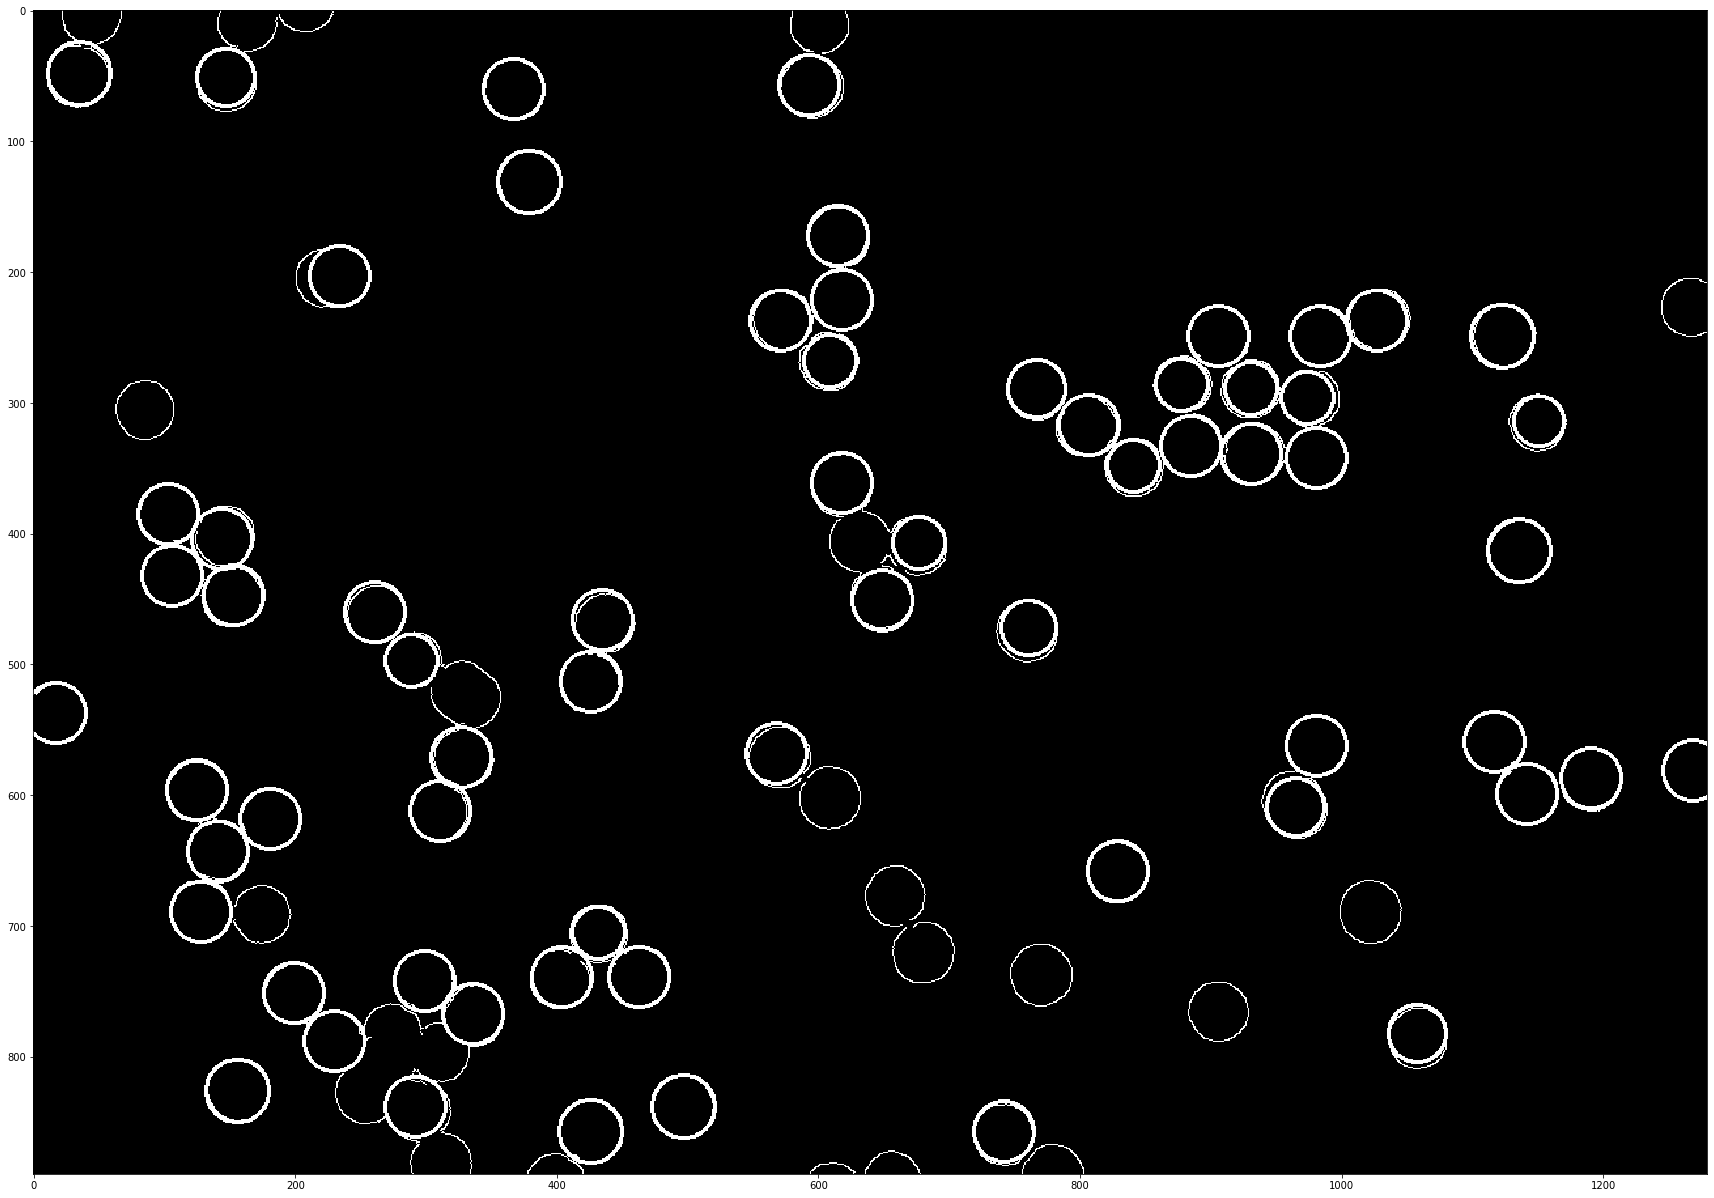

magnification is x15k
number of circles detected: 65


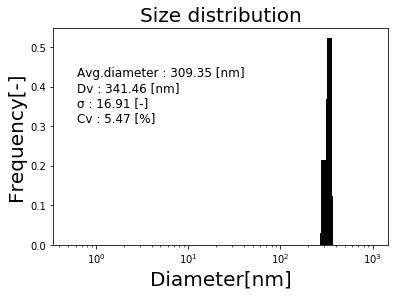

In [18]:
%matplotlib inline
import cv2
import numpy as np
import sys
from PIL import Image
import matplotlib.pyplot as plt
from statistics import stdev
plt.gray()


list1 = ['/content/drive/My Drive/sample.tif']


while bool(list1) == True:
  radius = []
  image = Image.open(list1[0], 'r')
  # 入力画像の読み込み
  img = cv2.imread(list1[0])
  #print(img)
  img2 = img[0:890, 0:1280]
  img_preprocessed = cv2.cvtColor(cv2.GaussianBlur(img2, (7, 7), 0), cv2.COLOR_BGR2GRAY)
  # find binary image with edges
  img_edges = cv2.Canny(img_preprocessed, threshold1=120, threshold2=150)
  circles = cv2.HoughCircles(img_edges, cv2.HOUGH_GRADIENT, dp=3.1, minDist=30, minRadius=10,
                             maxRadius=60)
  radius.extend(circles[0][:, 2])
  img_circles = np.copy(img_edges)
  if circles is not None and len(circles) > 0:
      circles = circles[0]
      for (x, y, r) in circles:
          cv2.circle(img_circles, (x, y), r, (255, 255, 0), 2)
  fig = plt.figure(figsize=(30,35))
  plt.imshow(img_circles)
  plt.show()
  del list1[0]

magnification = '15'
print('magnification is x' + magnification + 'k')
numbers = len(radius)
diameter = [i * 200 / float(magnification) for i in radius]
volume = [i * i * i * 4 / 3 for i in diameter]
#print(diameter)
#print(volume)
print('number of circles detected: %d' % numbers)

average_diameter = sum(diameter) / numbers
dv = (sum(volume) / numbers) ** (1 / 3)
standard_deviation = stdev(diameter)
cv = standard_deviation / average_diameter * 100

fig, ax = plt.subplots()

plt.rcParams['font.family'] = 'Arial'
ax.hist(diameter, density=True, bins=2000, range=(0, 1000), width=40, color='#000000')
plt.xscale("log")
plt.title('Size distribution', fontsize=20)
plt.xlabel("Diameter[nm]", fontsize=20)
plt.ylabel("Frequency[-]", fontsize=20)
ax.text(0.07, 0.5, "Avg.diameter : " + str(round(average_diameter, 2)) + ' [nm]\nDv : ' + str(
    round(dv, 2)) + ' [nm]\nσ : ' + str(round(standard_deviation, 2)) + ' [-]\nCv : ' + str(
    round(cv, 2)) + ' [%]\n', transform=ax.transAxes, fontsize=12)

plt.show()